In [15]:
%matplotlib inline
from shutup import tensorflow_shutup
tensorflow_shutup()
import csv
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from datasets import *
import matplotlib.pyplot as plt
from keras import backend
from models import *

In [16]:
X = load_glucose_data()
print("Loaded", len(X), "samples")

autoencoder = make_conv_autoencoder()
print(autoencoder.summary())

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
autoencoder.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001, metrics=[rmse]))

history = autoencoder.fit(x=X, y=X, epochs=100, batch_size=32, shuffle=10000)
#codings = encoder.predict(dataset)
reconstruction = autoencoder.predict(X)

Loaded 48430 samples
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 16)                0         
                                                                 
 encoder (Dense)             (None, 3)                 51        
                                                                 
 decoder (Dense)             (None, 16)                64        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
None


TypeError: Unexpected keyword argument passed to optimizer: metrics. Allowed kwargs are {'clipvalue', 'global_clipnorm', 'clipnorm', 'decay', 'lr'}.

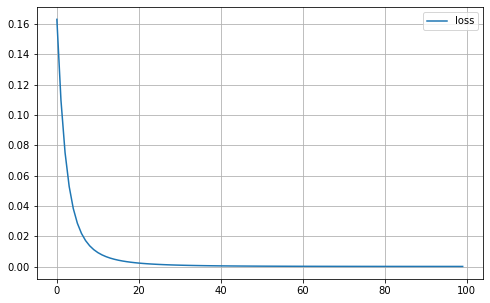

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

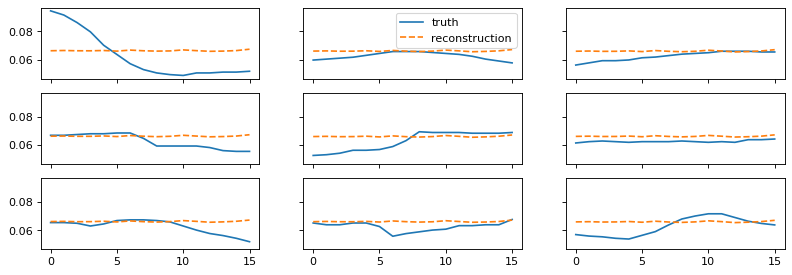

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 4), dpi=80)
axs = axs.flatten()
for i in range(len(axs)):
	axs[i].plot(X[i], label='truth')
	axs[i].plot(reconstruction[i], label='reconstruction', linestyle='--')
axs[1].legend()
plt.show()